# Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Functions

In [2]:
def activating_hill_func(y, beta, K, n):
    return beta * y ** n/ (K ** n + y ** n)

def repressing_hill_func(y, beta, K, n):
    return (beta * K ** n) / (K ** n + y ** n)

def pulse_func(x0, t, D_start, D_stop):
    # x0 > 0 implies for this assignment a switch on step, and switch off for x0 = 0
    if(x0 > 0):
        if(t > D_start and t < D_stop):
            return x0
        else:
            return 0
    else:
        if(t < D_start or t > D_stop):
            return 5
        else:
            return x0
        
def x_values(x0, t, D_start, D_stop):
    x = [x0] * len(t)
    x = np.array(x)
    if(x0 > 0):
        x[t < D_start] = 0
        x[t > D_stop] = 0
        return x
    else:
        x[t < D_start] = 5
        x[t > D_stop] = 5
        return x

def coherent_FFL(u, t, x0, alfa, beta, Ks, D_start, D_stop, n):
    y,z = u
    x = pulse_func(x0, t, D_start, D_stop)
    
    Kxy, Kyz, Kxz = Ks
    
    hill_xy = activating_hill_func(x, beta, Kxy, n)
    hill_yz = activating_hill_func(y, beta, Kyz, n)
    hill_xz= activating_hill_func(x, beta, Kxz, n)

    dydt = hill_xy - alfa * y
    dzdt = hill_xz * hill_yz - alfa * z
    return dydt, dzdt

def incoherent_FFL(u, t, x0, alfa, beta, Ks, D_start, D_stop, n):
    y,z = u
    x = pulse_func(x0, t, D_start, D_stop)
    
    Kxy, Kyz, Kxz = Ks
    
    hill_xy = activating_hill_func(x, beta, Kxy, n)
    hill_yz = repressing_hill_func(y, beta, Kyz, n)
    hill_xz = activating_hill_func(x, beta, Kxz, n)

    dydt = hill_xy - alfa * y
    dzdt = hill_xz * hill_yz - alfa * z
    return dydt, dzdt


def plot(x_values, y_values, color, y_label):
    plt.plot(x_values, y_values, color, linewidth=2)
    plt.xlabel('time')
    plt.ylabel('{}(t)'.format(y_label))
    plt.show()

# Conditions

In [3]:
# for this assignment, these conditions are left immutable
t = np.linspace(0,10)
n = 3

alfa = 1
beta = 5

x_steady = beta / alfa
y_steady = activating_hill_func(x_steady, beta, x_steady / 2, n) / alfa
Ks = [x_steady / 2, y_steady / 2, x_steady / 2]
z_steady_C1 = activating_hill_func(x_steady, beta, Ks[2], n) * activating_hill_func(y_steady, beta, Ks[1], n) / alfa
z_steady_I1 = activating_hill_func(x_steady, beta, Ks[2], n) * repressing_hill_func(y_steady, beta, Ks[1], n) / alfa

# Temporal profiles of Y and Z following an ON step of Sx for C1 FFL

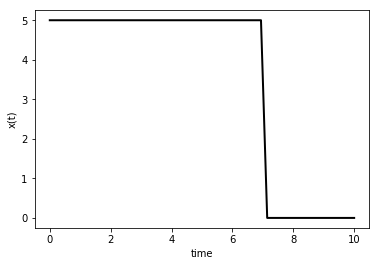

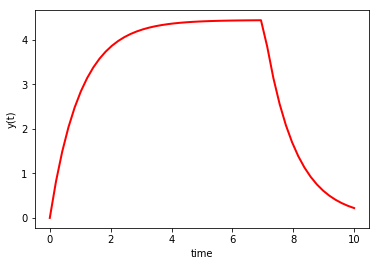

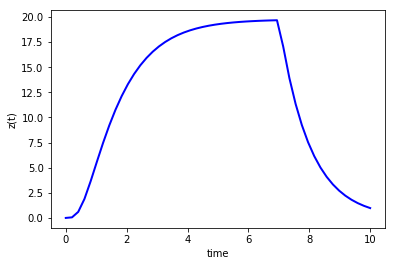

In [4]:
u0 = [0,0]
D_start = 0
D_stop = 7
x0 = 5

u = odeint(coherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

#  Temporal profiles of Y and Z following an OFF step of Sx for C1 FFL

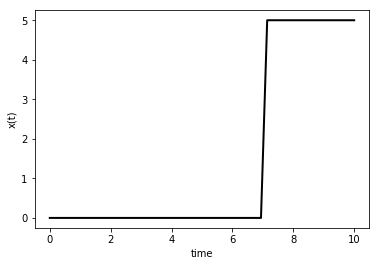

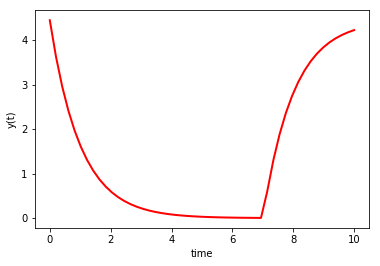

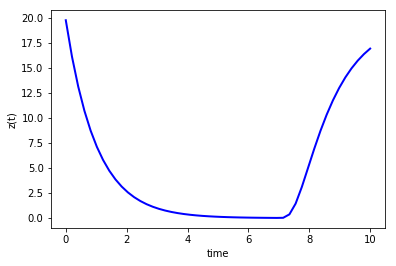

In [5]:
u0 = [y_steady, z_steady_C1]
x0 = 0
D_start = 0
D_stop = 7

u = odeint(coherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)
           
plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

#  Temporal profiles of Y and Z for pulses of Sx, duration = 2

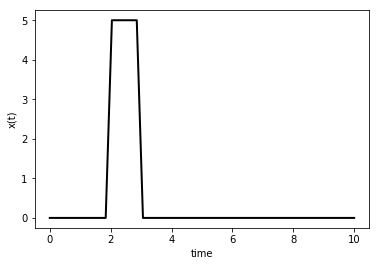

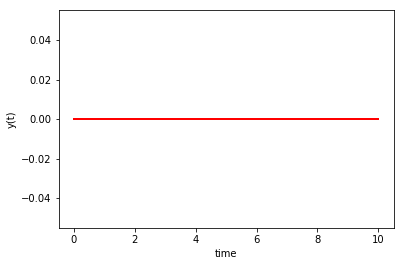

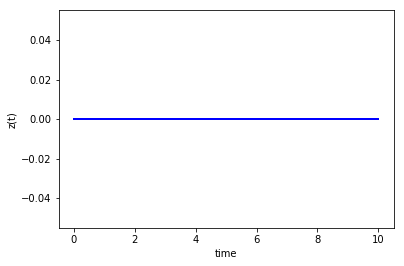

In [6]:
u0 = [0,0]
D_start = 2
D_stop = 3
x0 = 5

u = odeint(coherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

#  Temporal profiles of Y and Z for pulses of Sx, duration = 4

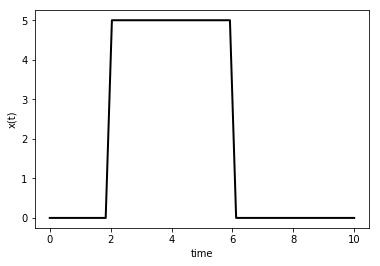

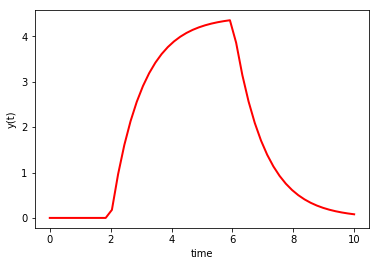

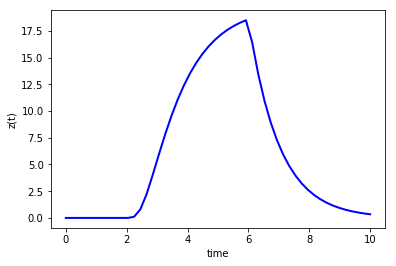

In [7]:
u0 = [0,0]
x0 = 5
D_start = 2
D_stop = 6

u = odeint(coherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

#  Temporal profiles of Y and Z for pulses of Sx, duration = 6

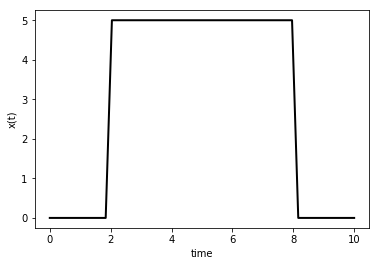

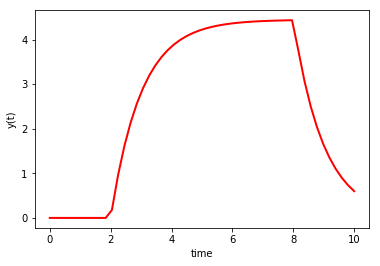

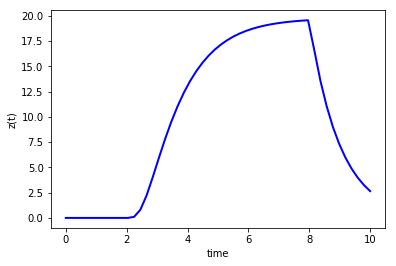

In [8]:
u0 = [0,0]
x0 = 5
D_start = 2
D_stop = 8

u = odeint(coherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

#  Temporal profiles of Y and Z following an ON step of Sx for I1 FFL

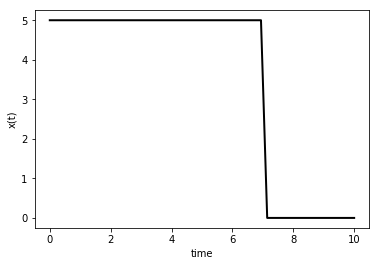

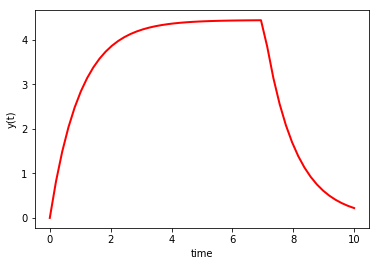

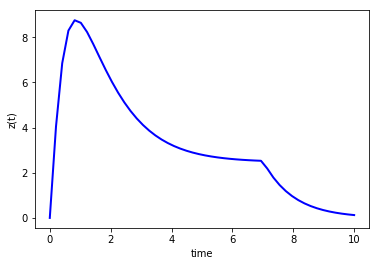

In [9]:
u0 = [0,0]
x0 = 5
D_start = 0
D_stop = 7

# solve ODE
u = odeint(incoherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')

# Temporal profiles of Y and Z following an OFF step of Sx 

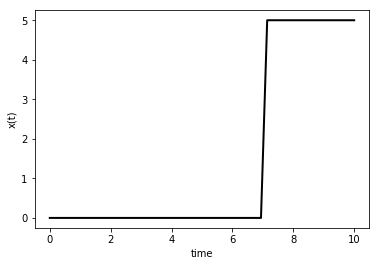

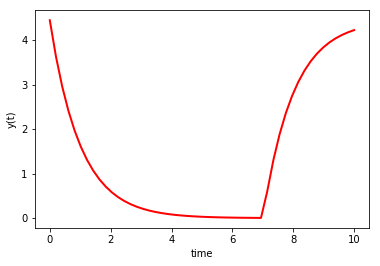

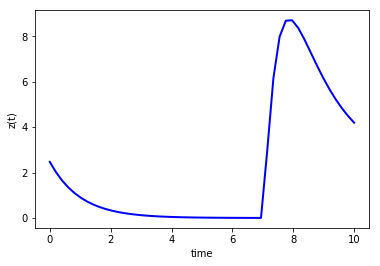

In [11]:
u0 = [y_steady,z_steady_I1]
x0 = 0
D_start = 0
D_stop = 7

# solve ODE
u = odeint(incoherent_FFL, u0, t, (x0, alfa, beta, Ks, D_start, D_stop, n))
x = x_values(x0, t, D_start, D_stop)

plot(t, x, 'k-', 'x')
plot(t, u[:,0], 'r-', 'y')
plot(t, u[:,1], 'b-', 'z')